## Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

#### Вводные замечания
Проект посвящен выявлению закономерностей успешности интернет-магазина компьютерных игр "Стримчик". 
#####  Доступные показатели
Из открытых источников доступны данные до 2016 о продажах игр, оценки пользователей и экспертов, жанры и платформы:
###### Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
##### Цель 
Нахождение потенциально популярного продукта и планирование рекламной кампании на 2017 год

In [1]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data.head(10))
display(data.info())
display(data.describe())
print('\nПропущенные значения:')
print(data.isna().sum())
print('Явные дубликаты:', data.duplicated().sum())

Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000


Пропущенные значения:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
Явные дубликаты: 0


В некоторых колонках данных очень много пропусков (почти половина от общего массива), а значит, не для всех параметров можно сформировать точные выводы

## Подготовьте данные

In [3]:
data.columns = data.columns.str.lower() #приводим названия колонок к нижнему регистру
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Какие данные следует изменить:
- Значения столбца Year_of_Release должны быть целочисленными
- Значения столбца User_Score должны быть числовыми (с плавающей точкой)

In [4]:
data['year_of_release'] = data['year_of_release'].fillna(0).astype('int32') #заполним пропуски 0, так как средними значениями их зааполнить невозможно
print(data['user_score'].unique()) #узнаем, какие значения есть в колонке user_score, кроме числовых
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan #заменим значения 'tbd' на NaN:
data['user_score'] = data['user_score'].astype('float32') 
display(data.info())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64


None

### Обработка пропусков

Причин для появления пропусков может быть несколько: 1)разработчик не указал какие-нибудь сведения, например, год релиза игры 2)значения фактически отсутствует, например, какую-то игру никогда не оценивали критики или пользователи 3) пропуски были оставлены умышленно, рассчитывая на автозаполнение спецсимволами

В колонке name только два пропуска, они составляют менее 1% от массива, поэтому эти данные можно удалить:

In [5]:
data = data.dropna(subset=['name'])
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


Столбцы critic_score, user_score содержат критично важную информацию, которая не подлежит корректному восстановлению, поэтому оставим пропуски в них без изменений.

Заполним те значения колонки rating, которые уже были выставлены этой игре (сгруппировав по названию игр):

In [6]:
name_rating = data[['name', 'rating']]
name_rating.dropna(subset=['rating'], inplace=True)
name_rating.sort_values(by='name', inplace=True)
name_rating = name_rating.drop_duplicates(subset='name')
display(name_rating)


data = data.merge(name_rating, on='name', how='left')

data.drop(['rating_x'], axis='columns', inplace=True)
data.rename(columns={'rating_y':'rating'}, inplace=True)

print('Пропусков в rating после заполнения:', data['rating'].isna().sum())
display(data)



/tmp/ipykernel_96/3178013580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_rating.dropna(subset=['rating'], inplace=True)
/tmp/ipykernel_96/3178013580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  name_rating.sort_values(by='name', inplace=True)


name rating
2454              Tales of Xillia 2      T
1561        .hack//Infection Part 1      T
2990         .hack//Mutation Part 2      T
4265         .hack//Outbreak Part 3      T
3757                     007 Racing      T
...                             ...    ...
10843                    thinkSMART      E
14453            thinkSMART FAMILY!      E
16494    thinkSMART: Chess for Kids      E
645                    uDraw Studio      E
8280   uDraw Studio: Instant Artist      E

[6066 rows x 2 columns]

Пропусков в rating после заполнения: 6327


name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16708  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16709               LMA Manager 2007     X360             2006        Sports   
16710        Haitaka no Psychedelica      PSV             2016     Adventure   
16711               Spirits & Spells      GBA             2003      Platform   
16712            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
0         41.36     28.96      3.77         8.45          76.0         8.0   
1         29.08      3.58      6.81         0.77           NaN         NaN   
2         15.68     12.76      3.79         3.29          82.0         8.3   
3         15.61     10.93      3.28         2.95          80.0         8.0   
4         11.27      8.89     10.22         1.00           NaN         NaN   
...         ...       ...       ...          ...           ...         ...   
16708      0.00      0.00      0.01         0.00           NaN         NaN   
16709      0.00      0.01      0.00         0.00           NaN         NaN   
16710      0.00      0.00      0.01         0.00           NaN         NaN   
16711      0.01      0.00      0.00         0.00           NaN         NaN   
16712      0.00      0.00      0.01         0.00           NaN         NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16708    NaN  
16709    NaN  
16710    NaN  
16711    NaN  
16712    NaN  

[16713 rows x 11 columns]

Остальные пропуски в этой колонке заполнить не удастся, так как невозможно выявить корреляцию между возрастным рейтингом игры и любыми другими показателями.

In [7]:
data['sum_sales_game'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1) #суммируем продажи во всех регионах

Выводы:

Приведение типов данных:
- Так как год выпуска может быть только целочисленным значением, столбец Year_of_Release привели к int.
- Оценку пользователей User_Score привели к float, так как заглушки для заполнения пропусков не использовались, со значениями float в дальнейшем будет проще работать при проверке гипотез. Значения "tbd" (to be determined) заменили на NaN.

Пропуски:

- В названии игры Name пропущено 2 значения, так как это менее 1% от массива данных, эти строки были удалены.
- Год выпуска Year_of_Release пропущен 269 раз. Пропуски были заменены на 0, чтобы привести параметр к целочисленному типу, так его будет легче обработать в дальнейшем.
- Пропуски в оценках пользователей и критиков заполнены не были, так как это критично важная информация, которая не подлежит ручному заполнению по средним значениям.
- Пропуски в колонке Rating частично заполнили информацией из соседних платформ. Оставшиеся пропуски заполнили значением "no rating", так как важно понимать, для каких игр информация о рейтинге отсутствует.
- Можно предположить, что активно данные по играм начали собираться после 2000 года, так как до этого момента времени концентрируются наибольшее количество пропусков.

Изменение данных:
- Приведение названий столбцов к нижнему регистру, так как с информацией в этом виде проще работать

Для пропусков рейтинга невозможно выявить корреляций с другими параметрами, поэтому заполним их заглушкой 'no rating':

In [8]:
data['rating'] = data['rating'].fillna('no rating')

## Проведите исследовательский анализ данных 

### Количество игр по годам

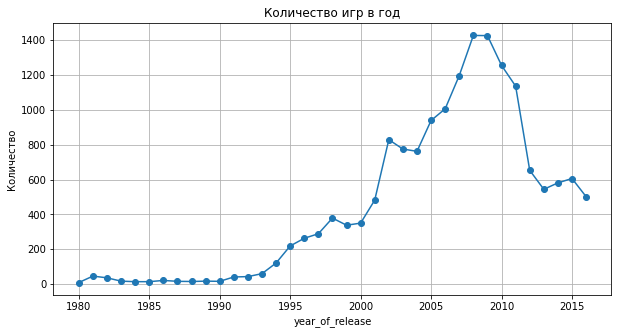

In [9]:
plt.figure(figsize=(10,5))
plt.title('Количество игр в год')
plt.xlabel('Год')
plt.ylabel('Количество')
data[data['year_of_release'] > 0].groupby('year_of_release')['platform'].agg('count').plot(grid=True, style='o-')
plt.show()

Рост количества игр начинается примерно в 1993 году, резкий скачок значения приходится на 2000 год. Самое большое количество игр выходило примерно в 2008-2009 годах. Если выделять диапазон выдающихся значений, то это период с 2005 по 2011 года. 

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

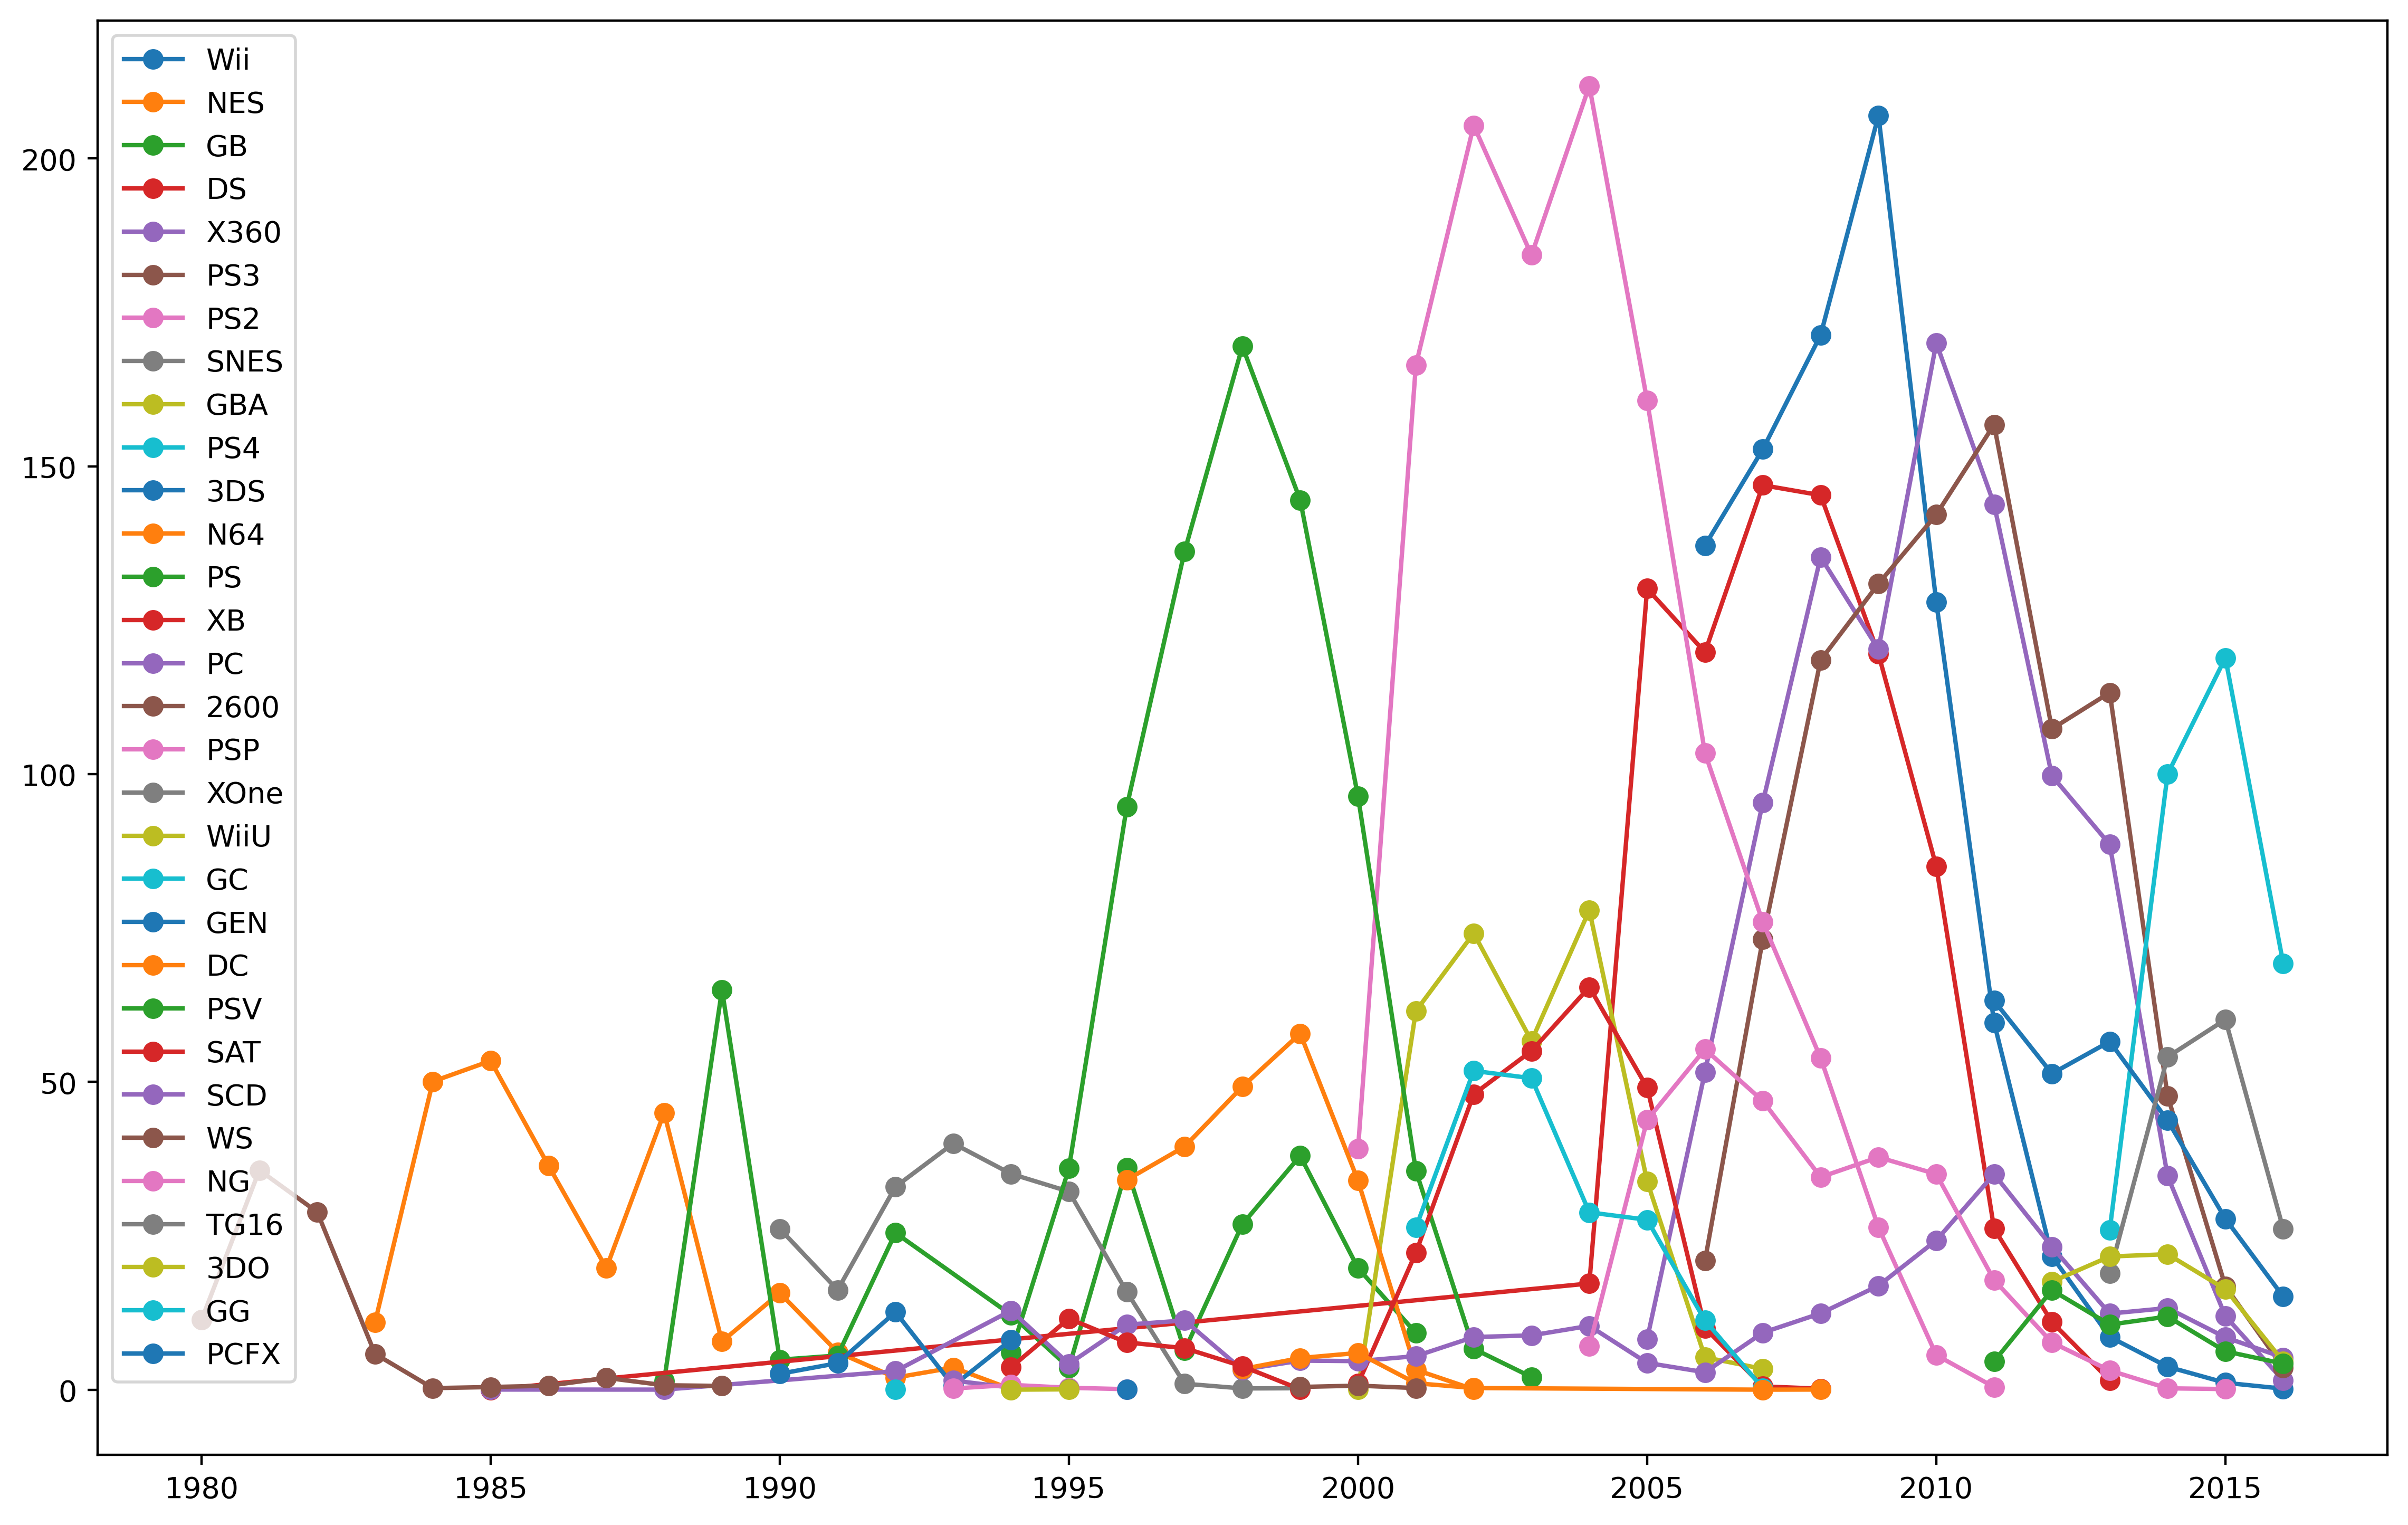

In [10]:
from matplotlib.pyplot import figure
plt.figure(figsize=(14, 9),dpi=400)
for i in data['platform'].unique():
    plt.plot(data[(data['year_of_release']>0) & (data['platform'] == i)].groupby('year_of_release')['sum_sales_game'].sum(), 
             'o-', label=i)

plt.legend(loc="upper left")
plt.show() #изменение продаж по платформам

    index platform  sum_sales_game
0      16      PS2         1255.77
1      28     X360          971.42
2      17      PS3          939.65
3      26      Wii          907.51
4       4       DS          806.12
5      15       PS          730.86
6       6      GBA          317.85
7      18      PS4          314.14
8      19      PSP          294.05
9      13       PC          259.52
10      2      3DS          259.00
11     29       XB          257.74
12      5       GB          255.46
13     11      NES          251.05
14     10      N64          218.68
15     23     SNES          200.04
16      7       GC          198.93
17     30     XOne          159.32
18      0     2600           96.98
19     27     WiiU           82.19
20     20      PSV           54.07
21     21      SAT           33.59
22      8      GEN           28.35
23      3       DC           15.95
24     22      SCD            1.86
25     12       NG            1.44
26     25       WS            1.42
27     24     TG16  

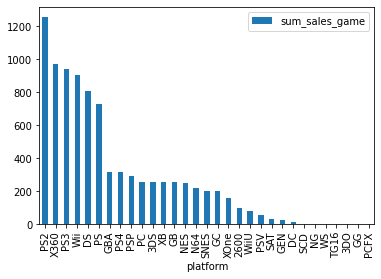

In [11]:
sale_platforms = data.groupby('platform')['sum_sales_game'].sum().reset_index()
sale_platforms.sort_values(by='sum_sales_game', ascending=False, inplace=True)
sale_platforms.reset_index(inplace=True)
print(sale_platforms)
sale_platforms.plot(y='sum_sales_game',x='platform',kind='bar')
plt.show() #топ платформ по продажам

На графике соотношения плафторм и продаж выделяется кластер с наибольшими продажами (первые 6 платформ в отсортированном списке), остальные платформы можно условно разделить на две группы: 1) с очень слабой разницей в продажах, где уменьшение в отсортированном списке выстраиваивается в почти горизонтальную линию (GBA:GC), 2) оставшиеся платформы, где в отсортированном списке продажи стремительно уменьшаются от платформы к платформе (XOne:PCFX). Проанализируем продажи по каждой группе с распределением по годам.

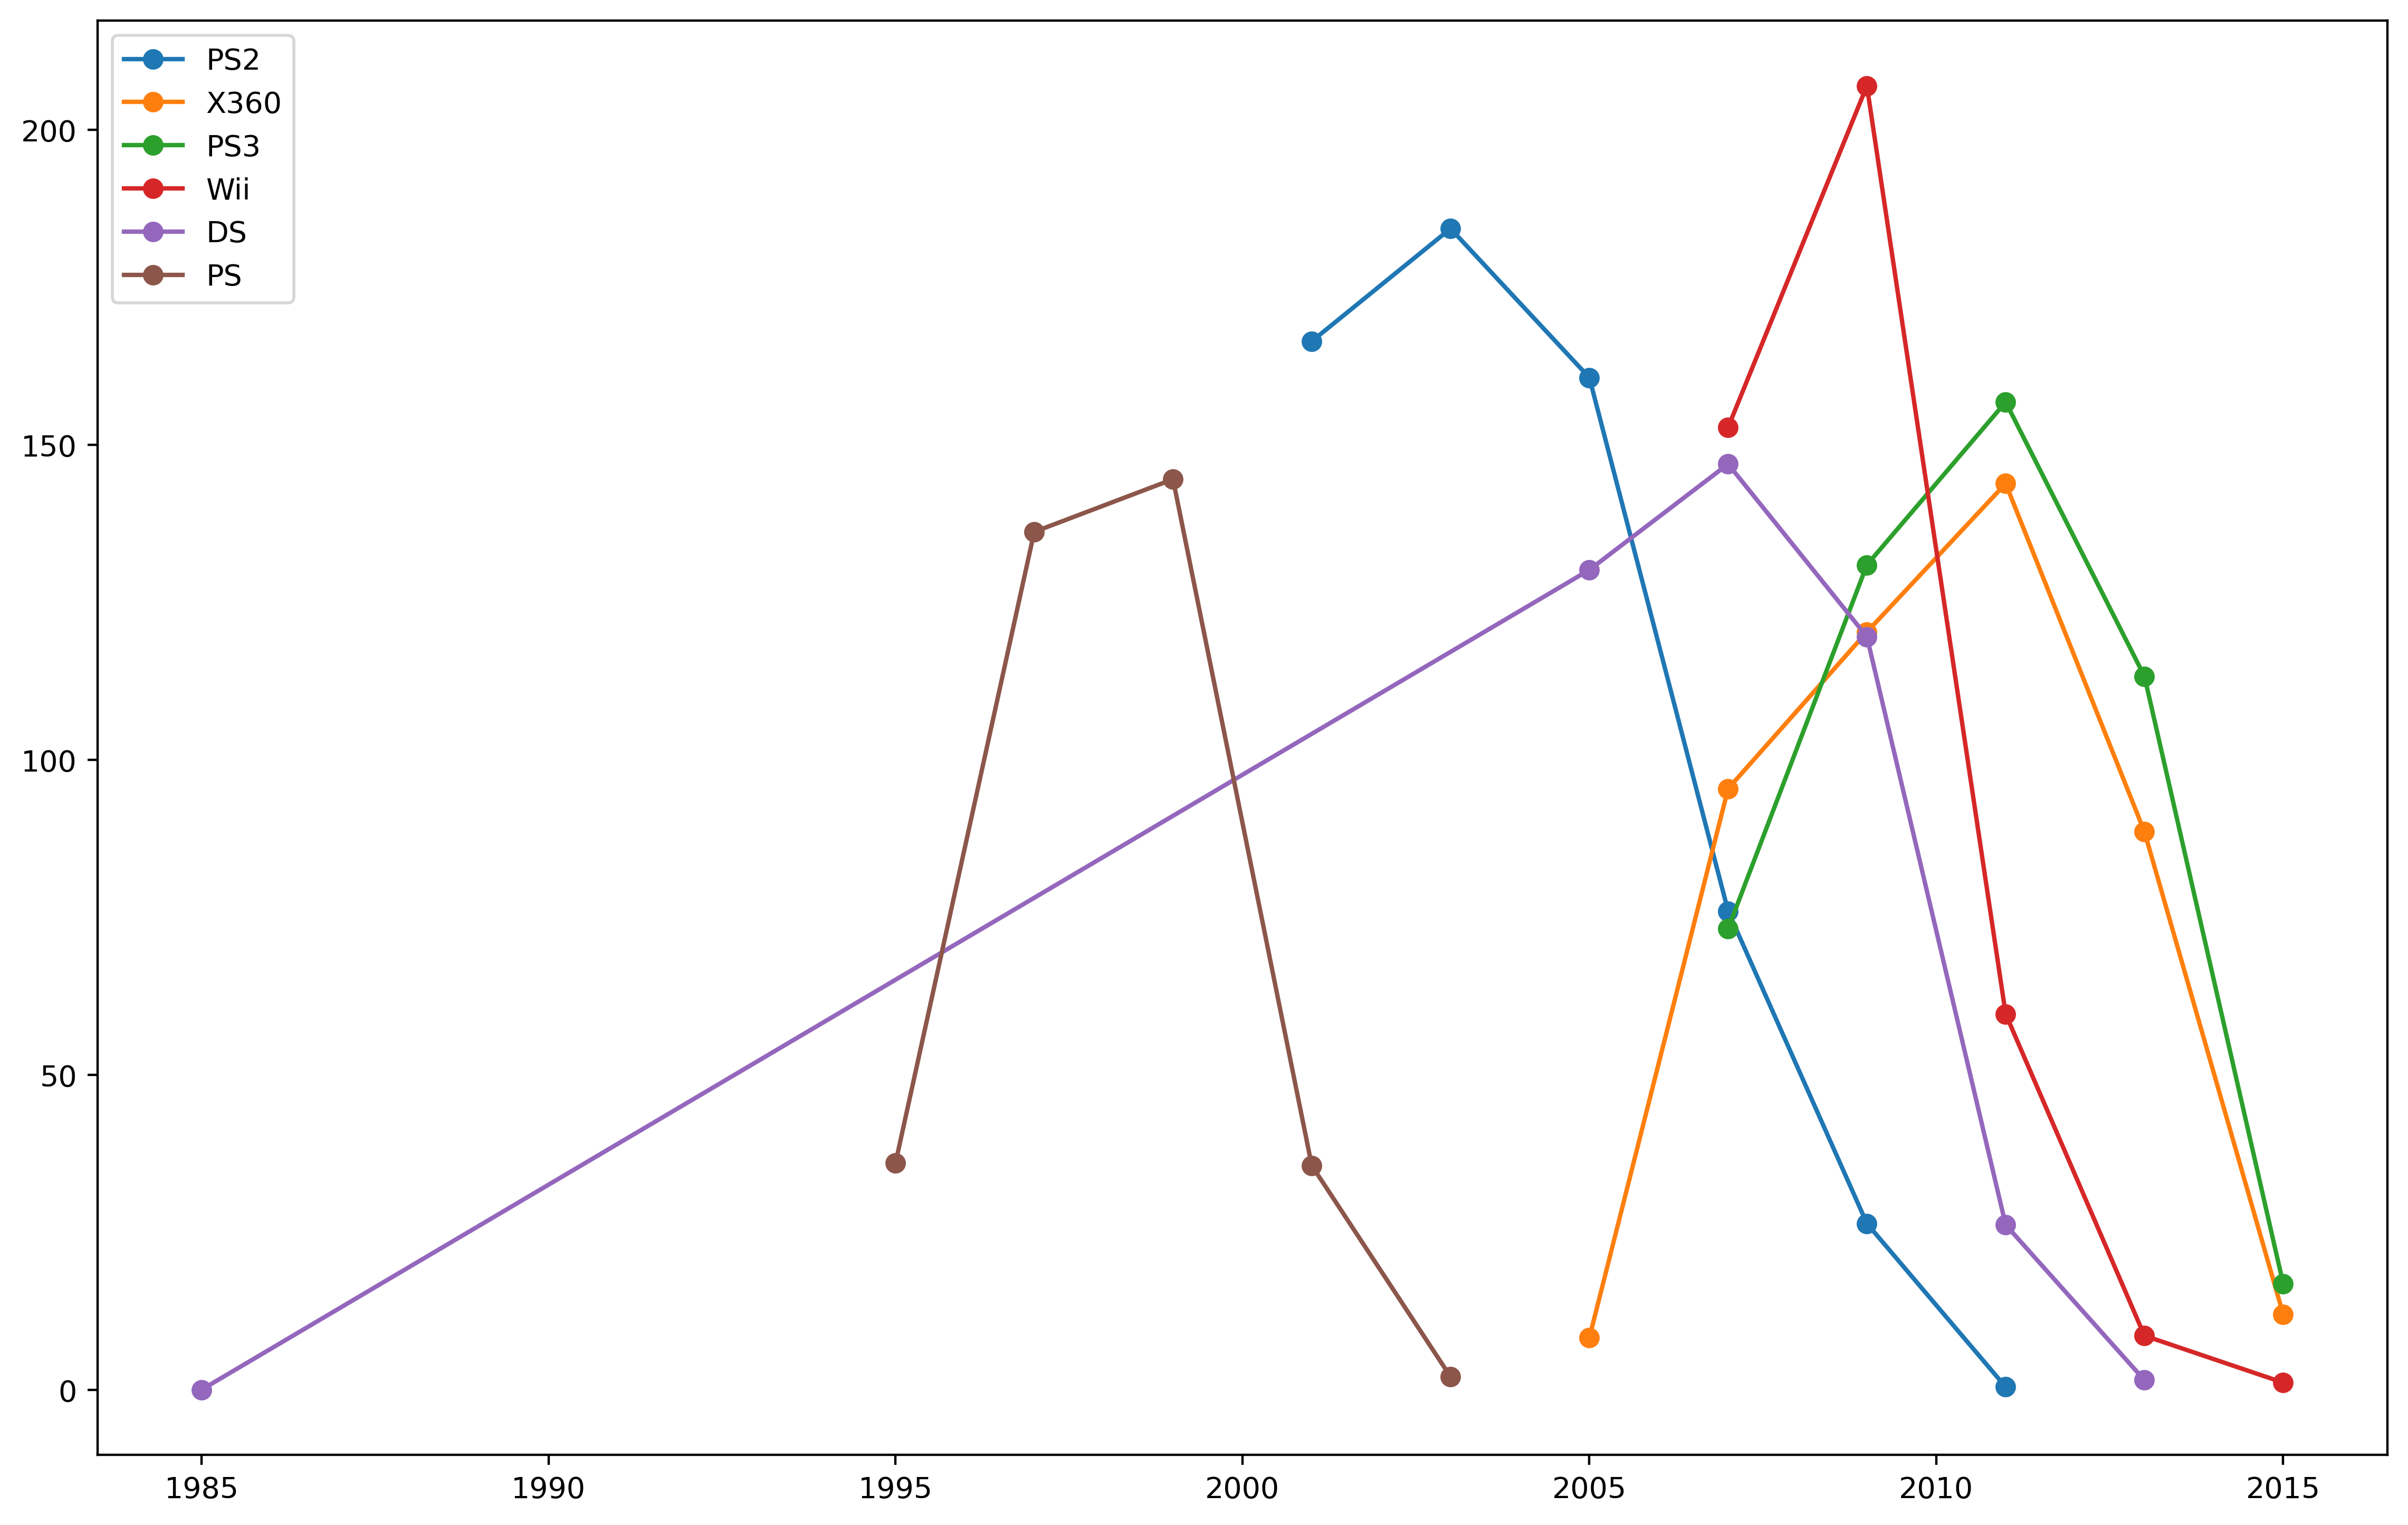

In [12]:
from matplotlib.pyplot import figure
plt.figure(figsize=(14, 9),dpi=400)
for i in sale_platforms.head(6)['platform'].values:
    plt.plot(data[(data['year_of_release']) & (data['platform'] == i)].groupby('year_of_release')['sum_sales_game'].sum(), 
             'o-', label=i)
plt.legend(loc="upper left")
plt.show() #изменение продаж по платформам

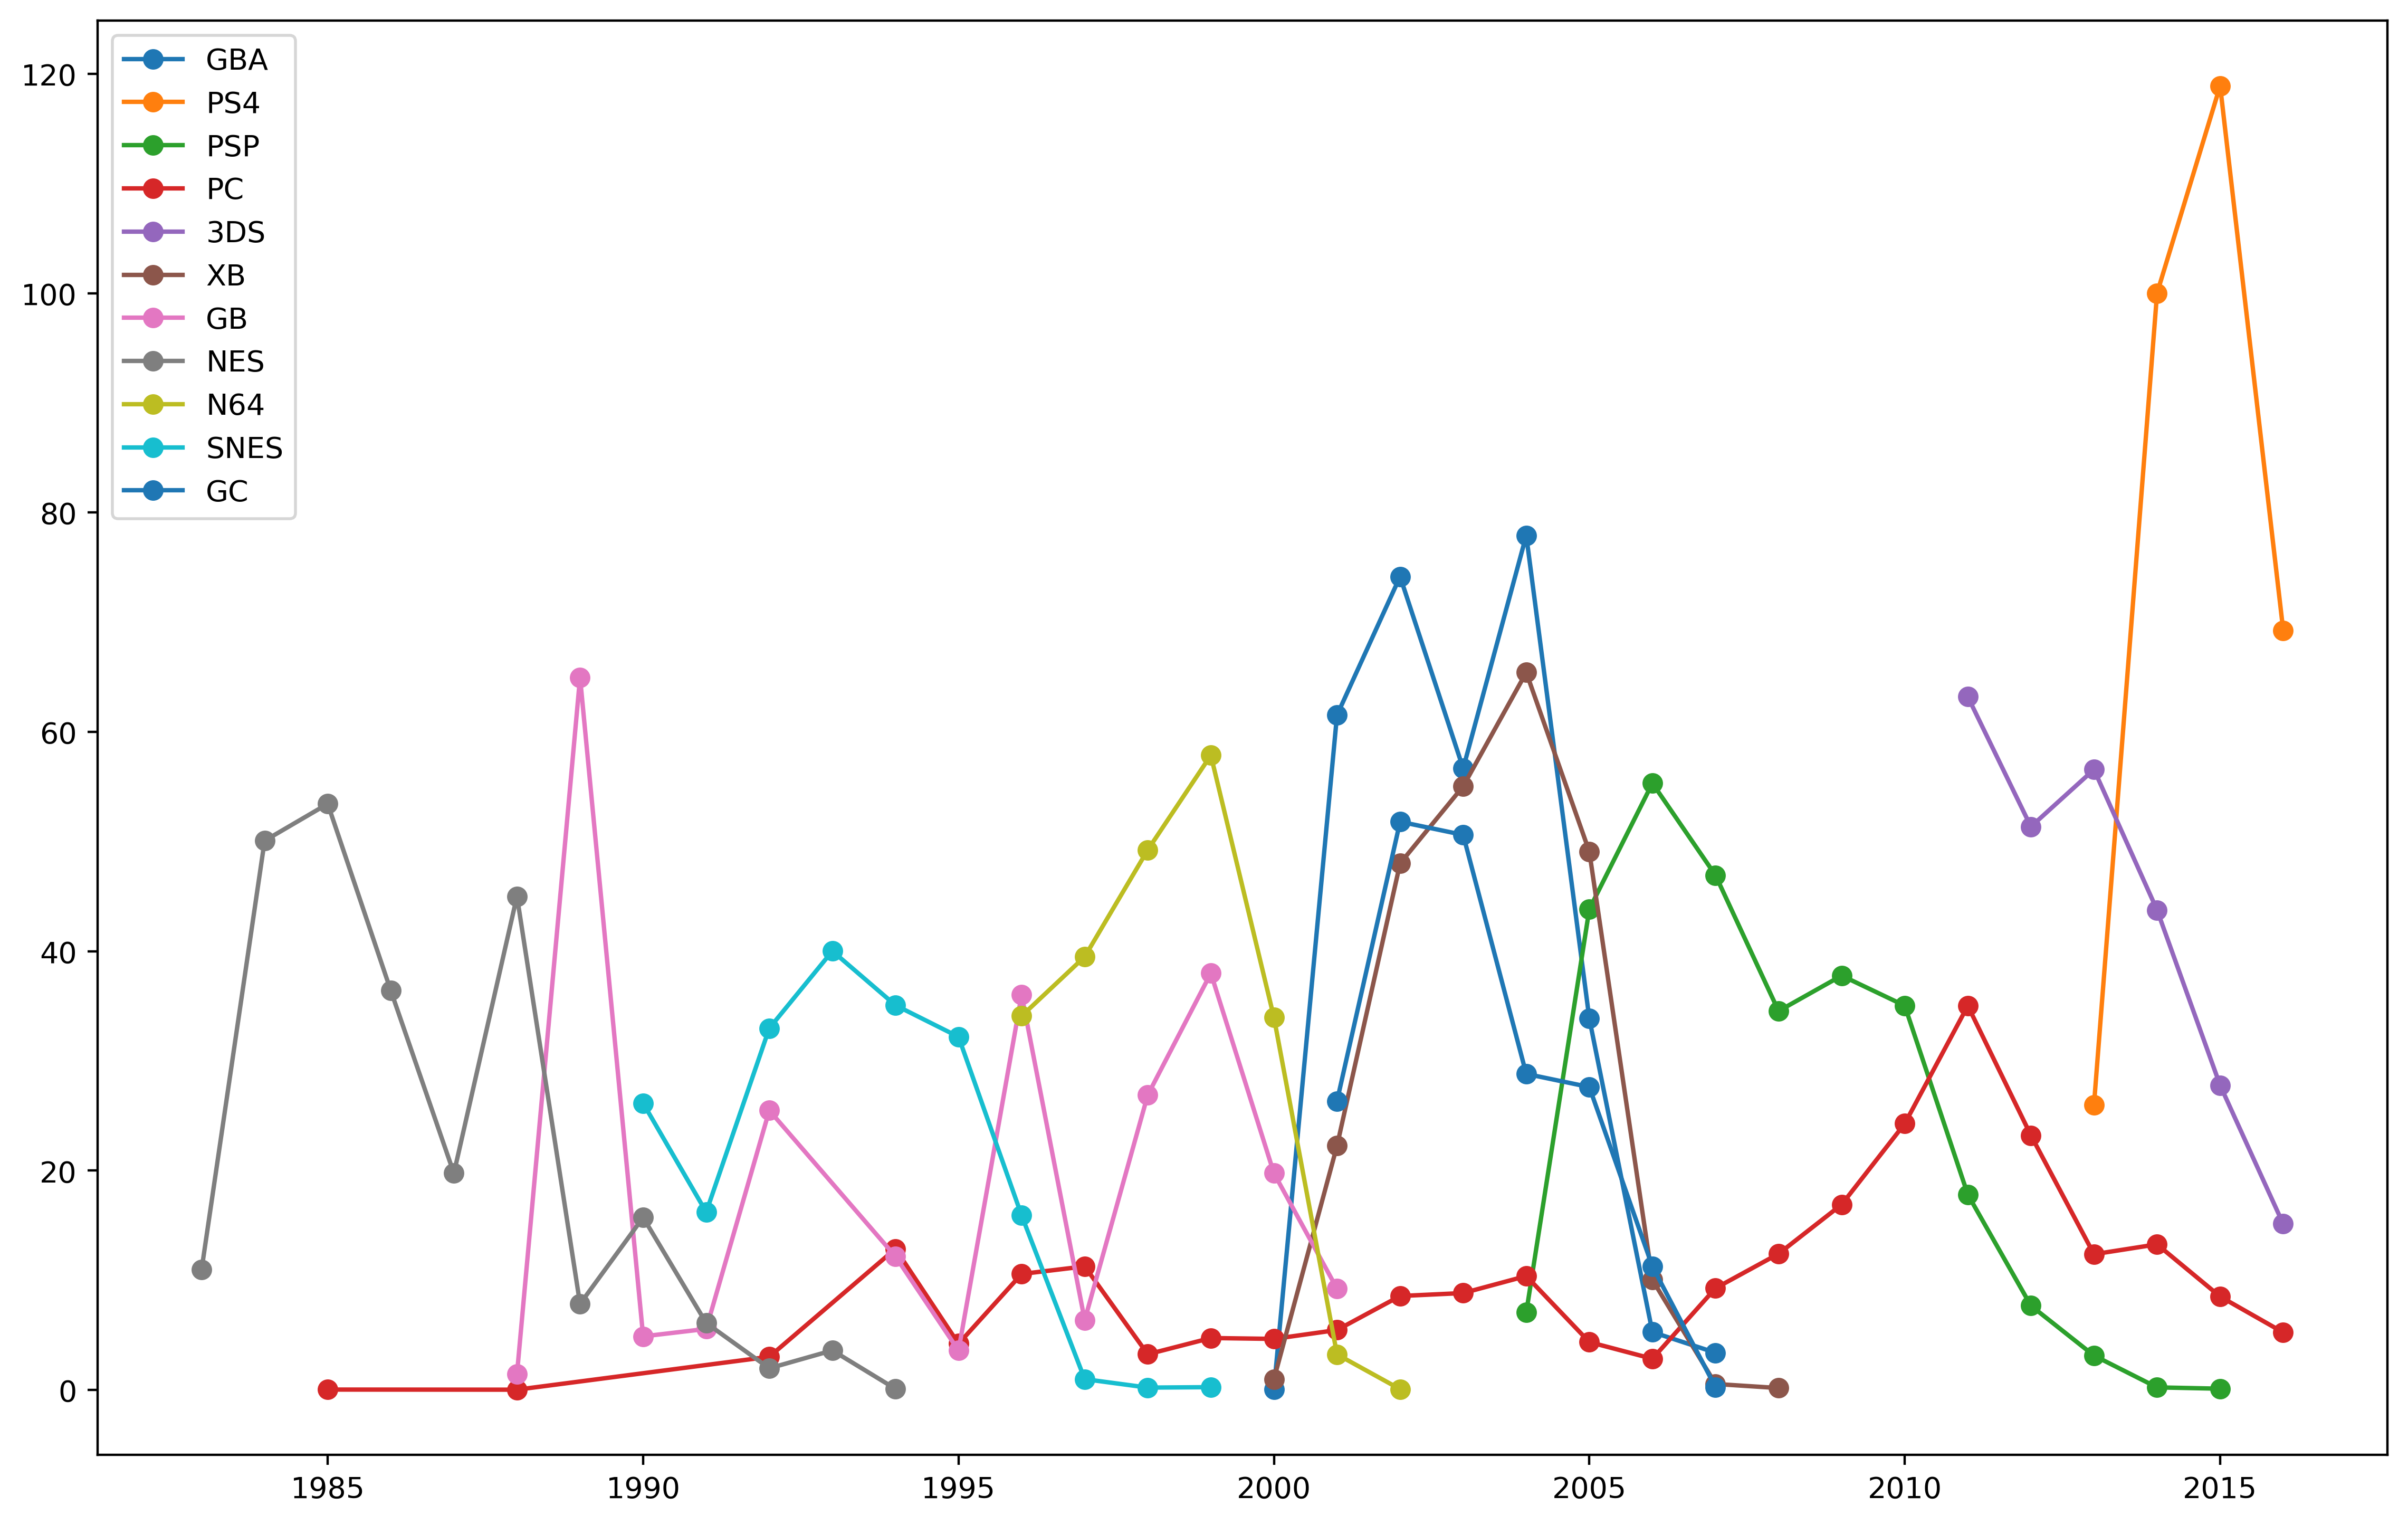

In [13]:
from matplotlib.pyplot import figure
plt.figure(figsize=(14, 9),dpi=400)
for i in sale_platforms.loc[6:16,:]['platform'].values:
    plt.plot(data[(data['year_of_release']>0) & (data['platform'] == i)].groupby('year_of_release')['sum_sales_game'].sum(), 
             'o-', label=i)
plt.legend(loc="upper left")
plt.show() #изменение продаж по платформам

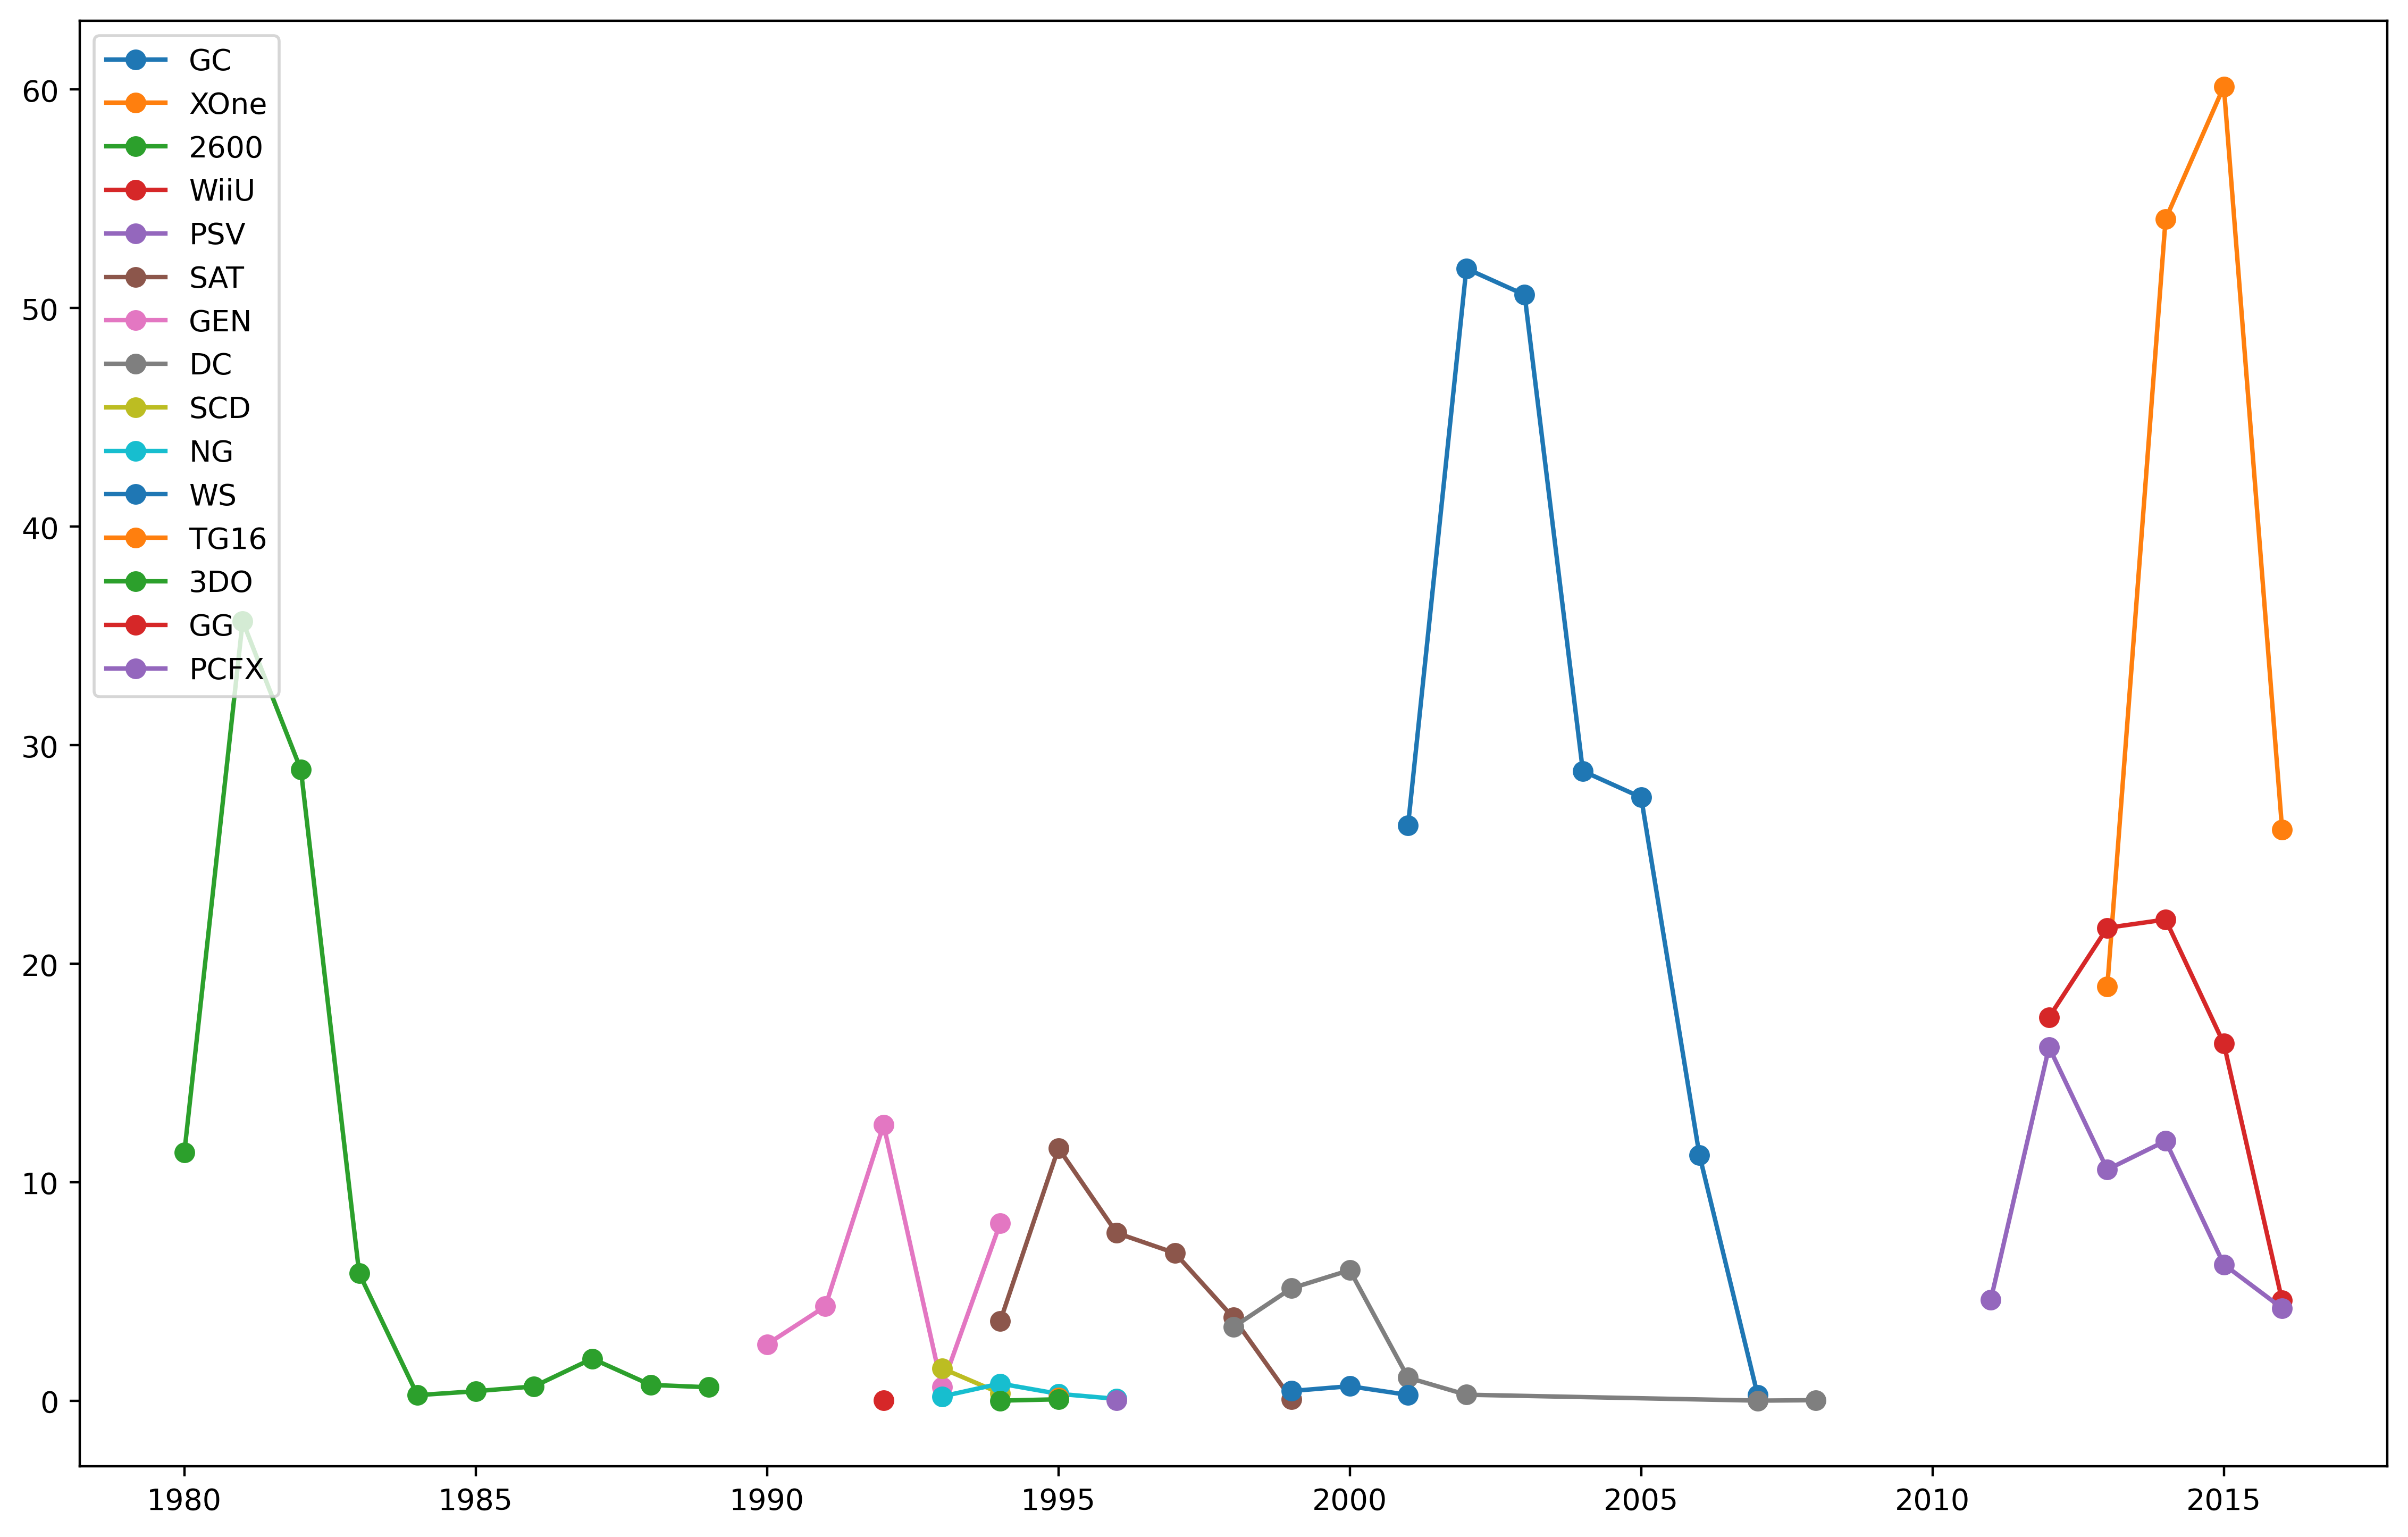

In [14]:
from matplotlib.pyplot import figure
plt.figure(figsize=(14, 9),dpi=400)
for i in sale_platforms.loc[16:,:]['platform'].values:
    plt.plot(data[(data['year_of_release']>0) & (data['platform'] == i)].groupby('year_of_release')['sum_sales_game'].sum(), 
             'o-', label=i)
plt.legend(loc="upper left")
plt.show() #изменение продаж по платформам

По графикам можно заметить, что в основном платформы существуют от 7 до 10 лет. Выявим платформы, для которых продажи на данный момент времени достигли пика (или просто не наблюдается падение продаж)
1) Можно заметить, что в 1 группе с самыми большими продажами ни одна платформа не находится на пике, продажи падают

2) Очевиден рост продаж для платформы PS4. Платформы PSP и PC находятся примерно в одном состоянии (продажи уже начали падать, но незначительно). Выберем из них платформу с наибольшими продажами за последние годы, т.е. PC. Точно по тому же принципу отбираем платформу 3DC.

3) Очевиден рост продаж для платформы XOne. Одинаковая тенденция по постепенному снижению для платформ WiiU и PCFX, по продажам отбираем WiiU.

Все выбранные платформы начали существовать после 2013 года, поэтому в качестве актуального периода выделим диапазон с 2013 по 2016 годы.

In [15]:
data = data.query('2013 <= year_of_release <= 2016')

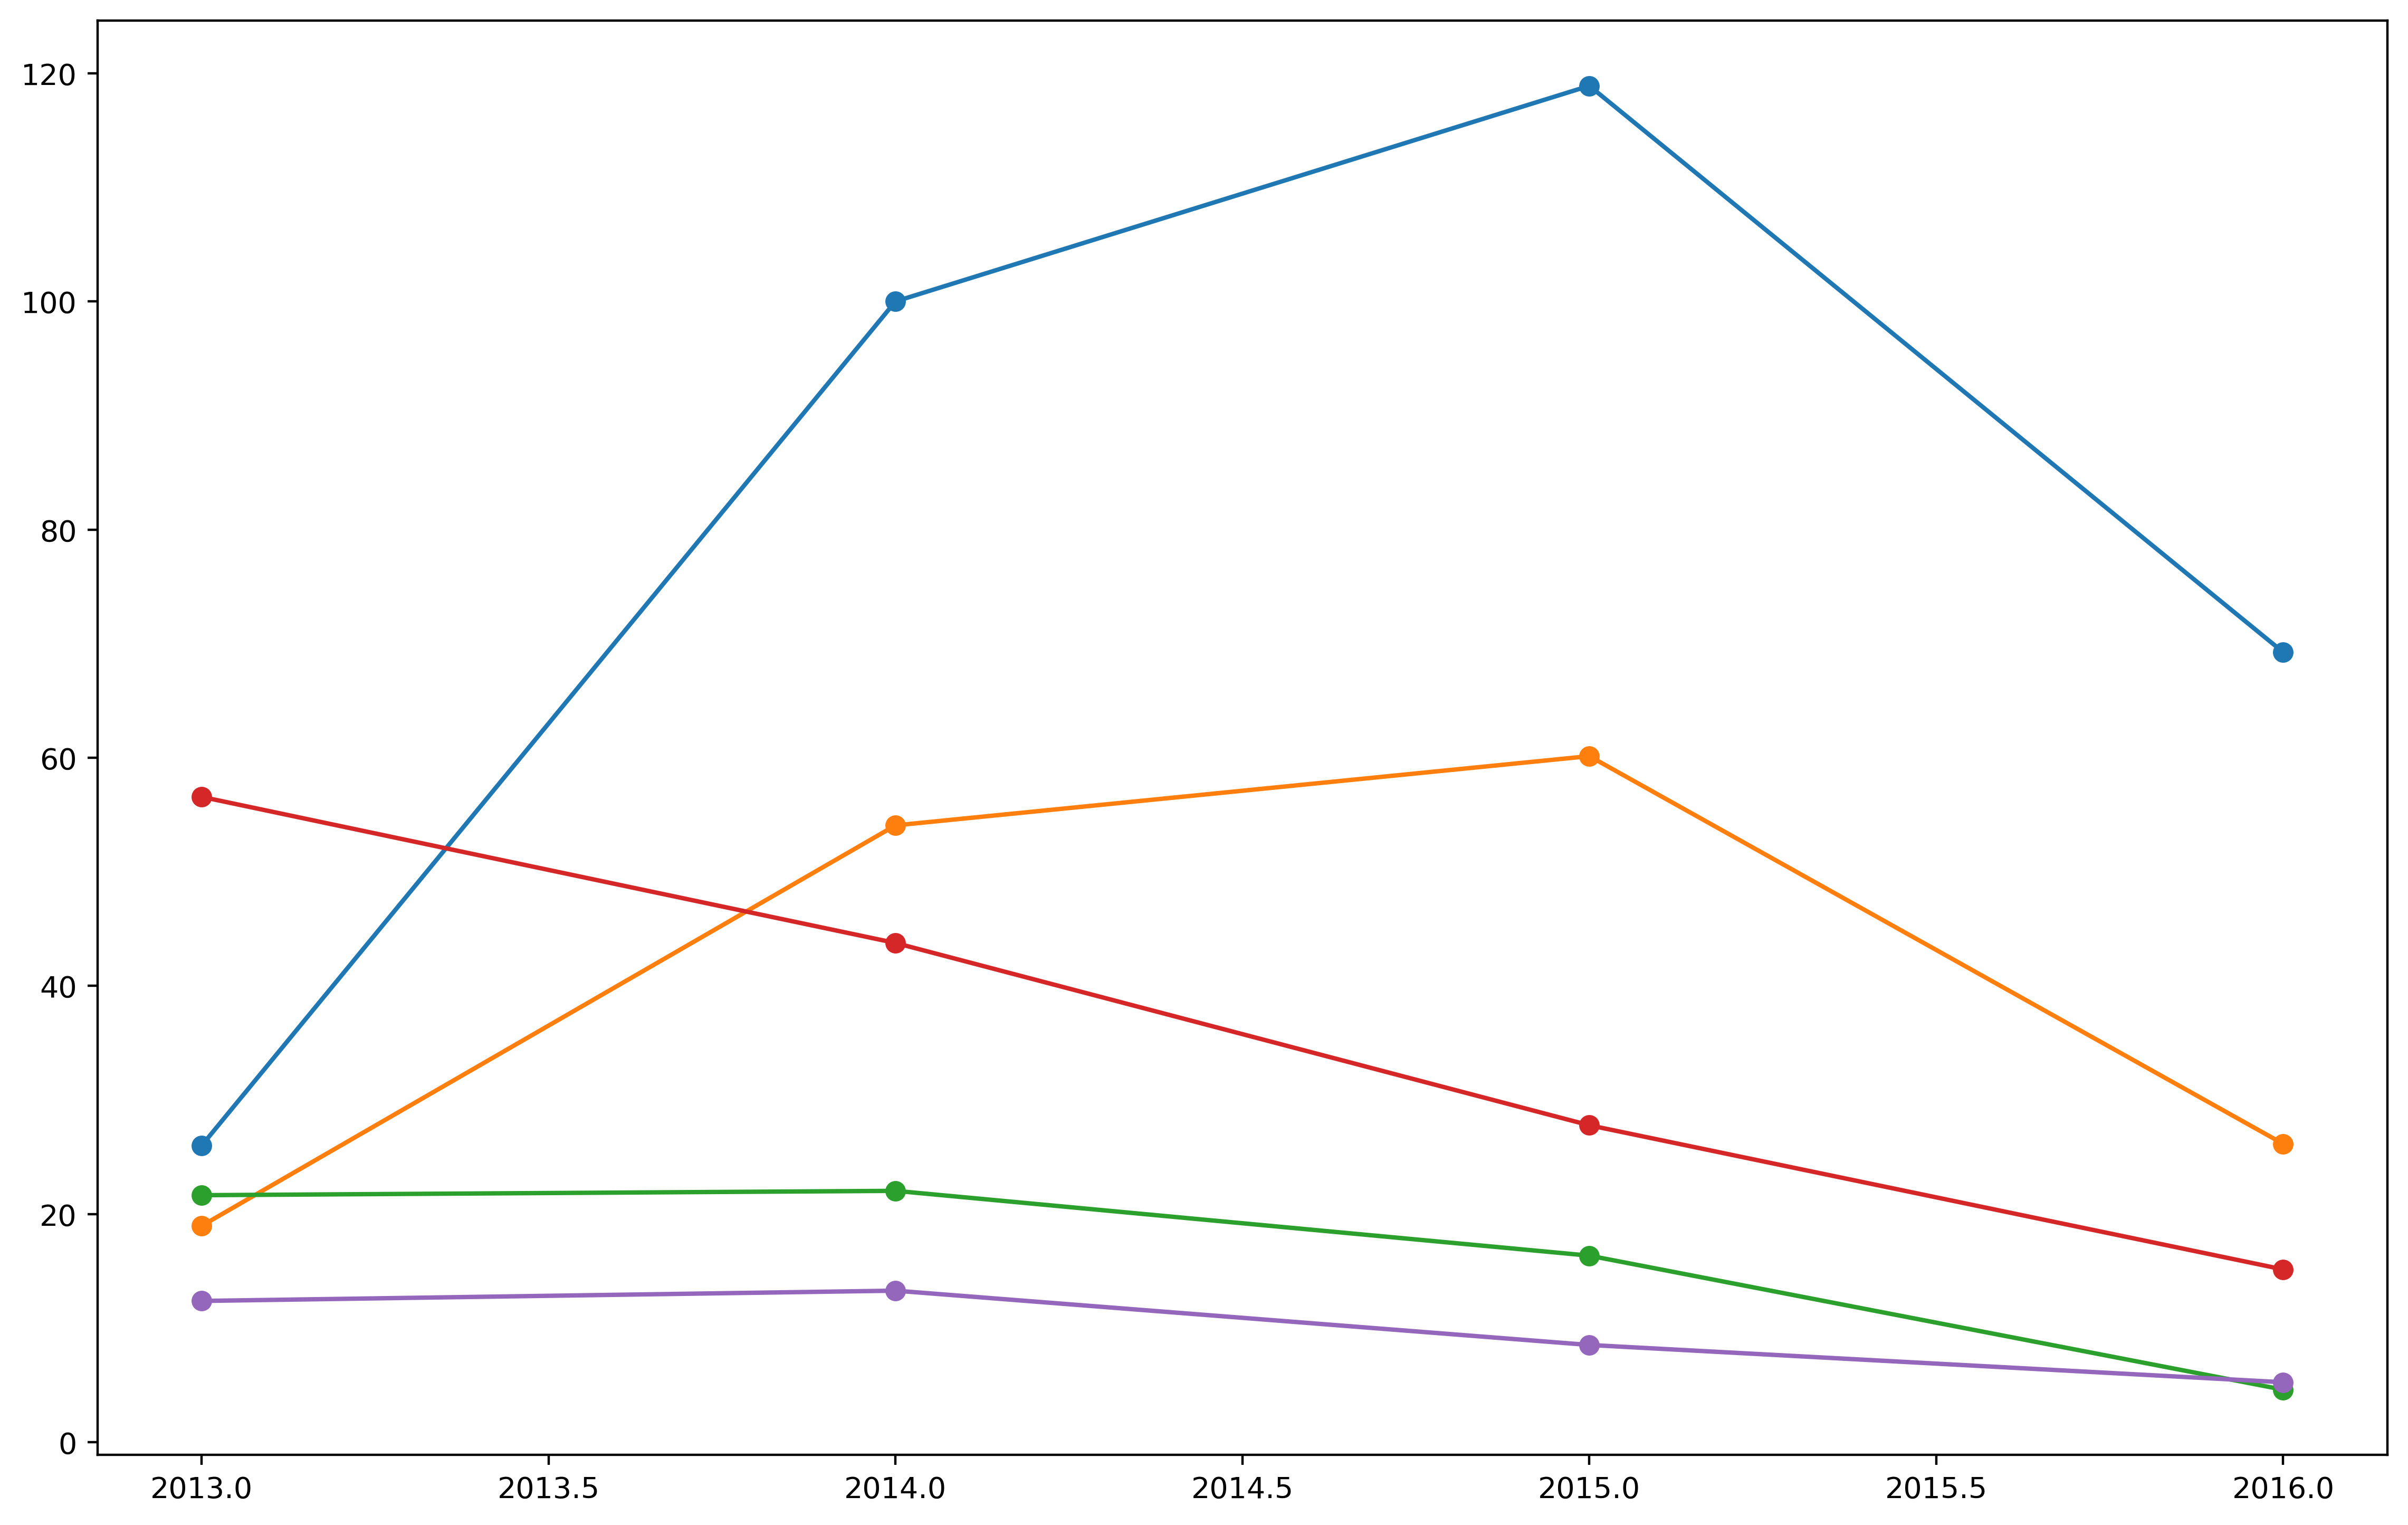

In [16]:
from matplotlib.pyplot import figure
plt.figure(figsize=(14, 9),dpi=400)
best_platforms = ['PS4', 'XOne', 'WiiU', '3DS', 'PC'] #продажи по актуальным и прибыльным платформам
for i in best_platforms:
    plt.plot(data[(data['year_of_release']>0) & (data['platform'] == i)].groupby('year_of_release')['sum_sales_game'].sum(), 
             'o-', label=i)
plt.show()


### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

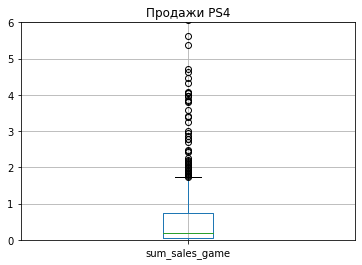

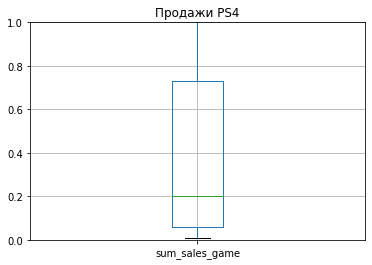

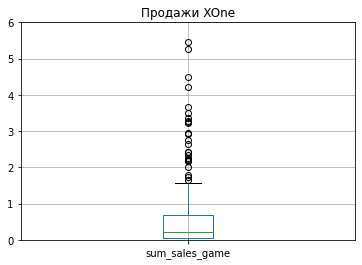

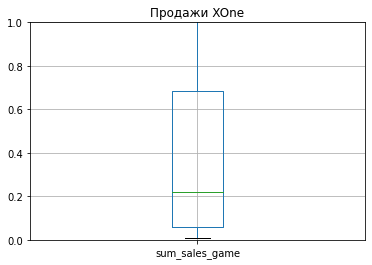

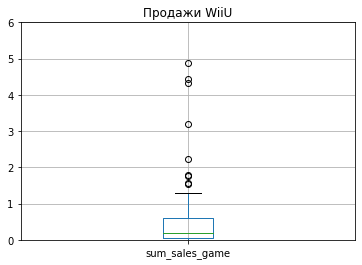

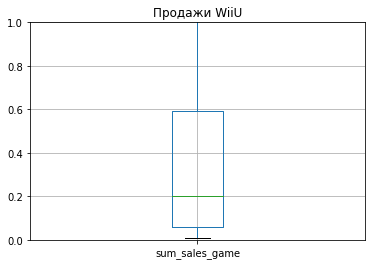

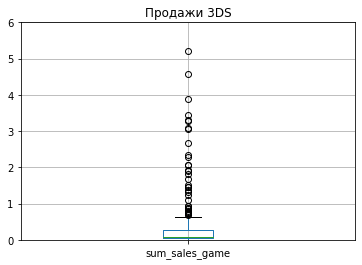

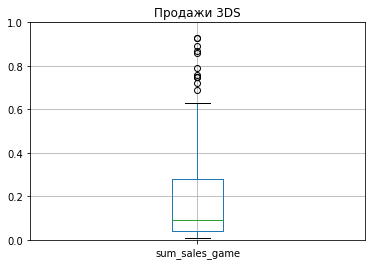

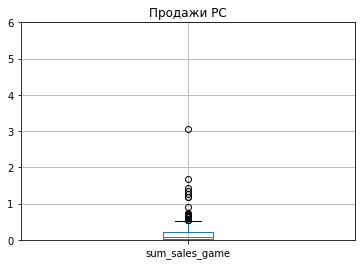

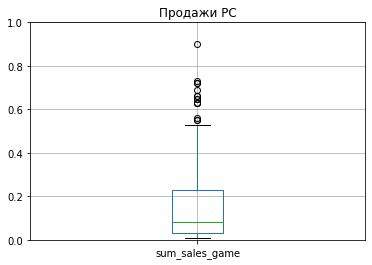

In [17]:
for i in best_platforms:
    plt.ylim(0, 6)
    plt.title('Продажи ' + i)
    data[data['platform'] == i].boxplot(column='sum_sales_game', figsize=(10,5))
    plt.show()
    plt.ylim(0, 1)
    plt.title('Продажи ' + i)
    data[data['platform'] == i].boxplot(column='sum_sales_game', figsize=(10,5))
    plt.show()


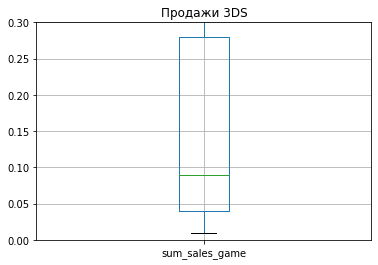

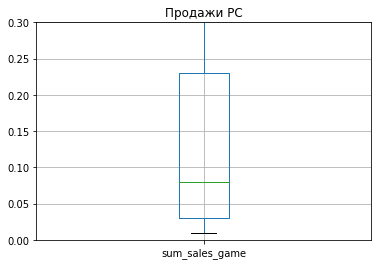

In [18]:
small_platforms=['3DS','PC']#отдельно рассмотрим платформы, 
#имеющие маленький инетрквартильный размах, чтобы четко увидеть медину и квартили
for i in small_platforms:
    plt.ylim(0, 0.3)
    plt.title('Продажи ' + i)
    data[data['platform'] == i].boxplot(column='sum_sales_game', figsize=(10,5))
    plt.show()    
   

Диаграммы расположены в порядке убывания среднего значения. Также можно заметить, что вместе со средним значением продаж убывает размер интерквартильного размаха. Это означает, что для платформ с большими продажами свойственен больший диапазон продаж. При этом для всех платформ наблюдаются аномальные значения в продажах, больше всего выбросов в выбранном диапазоне по оси ординат у платформы с самыми большими продажами - PS4.

Медиана продаж платформ 'PS4', 'XOne', 'WiiU' примерно равна 0.2, при этом медиана платформ 3DC и PC меньше - около 0.9 и 0.7 соответственно. Эту разницу можно объяснить тем, что платформы с медианой 0.2 уже почти полностью приблизились к оси абсцисс, то есть завершили снижение продаж, а для платформ с меньшей медианой продажи все еще накапливаются. 

Всем рассмотренным платформам свойственно следующее явление: диапазон с небольшими продажами меньше диапазона с большими продажами - об этом свидетельствует длина квартилей. Таким образом, до медианного значения продаж значения варьируются незначительно, но продажи, большие медианного значения, могут сильно варьироваться, но при этом каждое такое значение встречается реже значения из диапазона меньших затрат.

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Возьмем самую популярную платформу среди выбранных (PS4) и проанализируем корреляцию между отзывами пользователей и критиков и продажами. Для этого прежде всего напишем функцию, которая будет возвращать коэффициент корреляции Пирсона и диаграмму рассеяния. 

In [19]:
def sales_relation(data, param, title):
    (data.pivot_table(index=param, values='sum_sales_game', aggfunc='sum')
    .plot(grid=True, style='o', title=title, figsize=(10, 5)))
    try:
        print('Коэффициент корреляции Пирсона /', 'sum_sales_game', 'и', param, ':', data['sum_sales_game'].corr(data[param]))
    except:
        print('sales_relation: Коэффициент корреляции Пирсона вычислить не удалось')

Коэффициент корреляции Пирсона / sum_sales_game и user_score : -0.031957109005188264
Коэффициент корреляции Пирсона / sum_sales_game и critic_score : 0.406567902061781


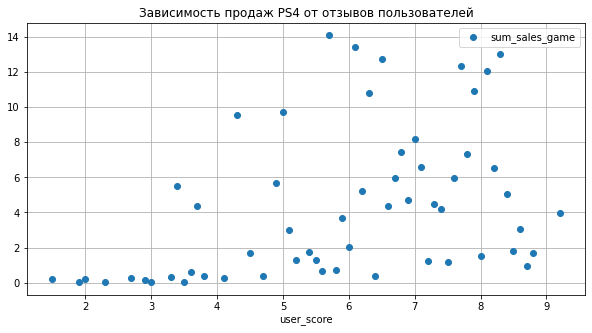

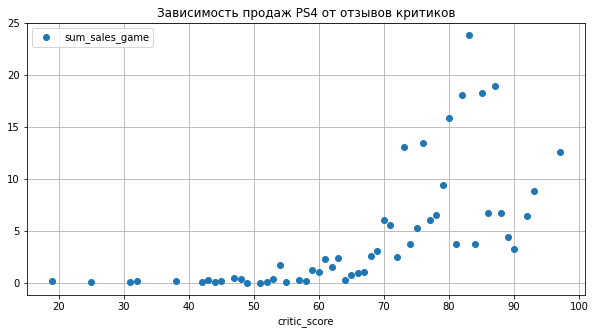

In [20]:
sales_relation(data[data['platform'] == 'PS4'], 
               'user_score', 'Зависимость продаж PS4 от отзывов пользователей')
# Корреляция между продажами и отзывами покупателей
sales_relation(data[data['platform'] == 'PS4'], 
               'critic_score', 'Зависимость продаж PS4 от отзывов критиков')
              # Корреляция между продажами и отзывами критиков 

#### Связь с оценками пользователей
Можно заметить, что в тех случаях, когда пользователи ставят низкие оценки (до 5), продажи действительно маленькие. Но далее линии тренда не прослеживается, корреляция отсутствует, о чем также свидетельствует коэффициент Пирсона. 

#### Связь с оценками критиков
Прослеживается (хоть и небольшая по коэффициенту Пирсона - ~39%) положительная корреляция между оценками критиков и уровнем продаж: чем выше оценка, тем больше продаж. При больших оценках критиков (70+), диапазон значений продаж очень большой, встречаются как маленькие, так и очень большие значения. Таким образом, корреляция между оценками критиков и продажами в большей степени присутствует для игр, которым критики ставят не слишком высокие оценки.

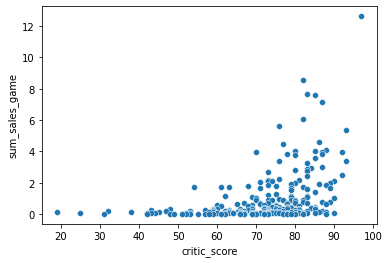

In [45]:
# код ревьюера
sns.scatterplot(x='critic_score', y='sum_sales_game', data=data[data['platform'] == 'PS4']);

Коэффициент корреляции Пирсона / sum_sales_game и user_score : 0.0193260947654888
Коэффициент корреляции Пирсона / sum_sales_game и critic_score : 0.3038076083262978


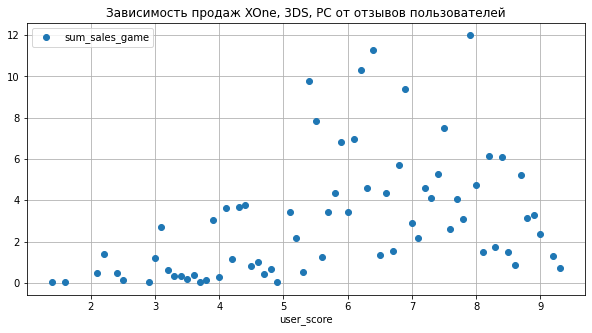

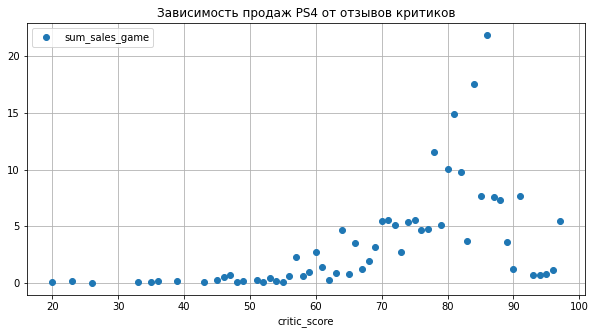

In [21]:
sales_relation(data[data['platform'].isin(['XOne', '3DS', 'PC'])], 
               'user_score', 'Зависимость продаж XOne, 3DS, PC от отзывов пользователей')
# Корреляция между продажами и отзывами покупателей
sales_relation(data[data['platform'].isin(['XOne', '3DS', 'PC'])],  
               'critic_score', 'Зависимость продаж PS4 от отзывов критиков')
              # Корреляция между продажами и отзывами критиков 

Основные тенденции для платформы PS4 по корреляции между продажами и отзывами пользователей и критиков сохраняются для всех платформ (промежутки, на которых корреляция очевидна, и промежутки, где размах значений продаж очень велик). Зависимость между продажами и оценками пользователей для всех платформ примерно так же мала, как при рассмотрении только платформы с наибольшими актуальными продажами. Зависимость между оценками критиков для платформы PS4 примерно на 10% больше, чем для совокупности платформ. Это может быть объяснено тем, что платформа PS4 получила больше оценок критиков, чем некоторые платформы в общей выборке, потому что является более популярной. Таким образом, корреляции, выявленные для платформы с наибольшими актуальными продажами, неплохо отражают зависимости, действующие для всей выборки платформ.

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [22]:
data_genre = (data.groupby('genre')
                    .agg(
                        count = ('platform', 'count'),
                        sales_sum = ('sum_sales_game', 'sum'),
                        sales_mean = ('sum_sales_game', 'mean'),
                    sales_median = ('sum_sales_game', 'median'))
                    .reset_index()
                )
display(data_genre.sort_values('sales_mean', ascending=False))
display(data_genre.sort_values('sales_median', ascending=False))
display(data_genre.sort_values('sales_sum', ascending=False))
print(data['genre'].describe())

genre  count  sales_sum  sales_mean  sales_median
8        Shooter    187     232.98    1.245882         0.450
10        Sports    214     150.65    0.703972         0.240
4       Platform     74      42.63    0.576081         0.225
7   Role-Playing    292     145.89    0.499623         0.125
6         Racing     85      39.89    0.469294         0.120
2       Fighting     80      35.31    0.441375         0.125
0         Action    766     321.87    0.420196         0.110
3           Misc    155      62.82    0.405290         0.100
9     Simulation     62      21.76    0.350968         0.100
5         Puzzle     17       3.17    0.186471         0.060
11      Strategy     56      10.08    0.180000         0.080
1      Adventure    245      23.64    0.096490         0.030

genre  count  sales_sum  sales_mean  sales_median
8        Shooter    187     232.98    1.245882         0.450
10        Sports    214     150.65    0.703972         0.240
4       Platform     74      42.63    0.576081         0.225
7   Role-Playing    292     145.89    0.499623         0.125
2       Fighting     80      35.31    0.441375         0.125
6         Racing     85      39.89    0.469294         0.120
0         Action    766     321.87    0.420196         0.110
9     Simulation     62      21.76    0.350968         0.100
3           Misc    155      62.82    0.405290         0.100
11      Strategy     56      10.08    0.180000         0.080
5         Puzzle     17       3.17    0.186471         0.060
1      Adventure    245      23.64    0.096490         0.030

genre  count  sales_sum  sales_mean  sales_median
0         Action    766     321.87    0.420196         0.110
8        Shooter    187     232.98    1.245882         0.450
10        Sports    214     150.65    0.703972         0.240
7   Role-Playing    292     145.89    0.499623         0.125
3           Misc    155      62.82    0.405290         0.100
4       Platform     74      42.63    0.576081         0.225
6         Racing     85      39.89    0.469294         0.120
2       Fighting     80      35.31    0.441375         0.125
1      Adventure    245      23.64    0.096490         0.030
9     Simulation     62      21.76    0.350968         0.100
11      Strategy     56      10.08    0.180000         0.080
5         Puzzle     17       3.17    0.186471         0.060

count       2233
unique        12
top       Action
freq         766
Name: genre, dtype: object


#### Выводы:
Самое большое суммарное количество продаж наблюдается для игр в жанре Action, таких этом игр этого жанра также больше всего в выборке, что объясняет предыдущий вывод. При этом и по медианному, и по среднему значению продаж лидируют игры в жанре Shooter (в 4 раза меньше по количеству, чем игр в жанре Action). Также популярным является жанр Sports.
Самыми неприбыльными жанрами в целом можно назвать Puzzle, Strategy, Adventure (последний жанр при этом представлен в большом количестве). 


##  Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Напишем функцию, которая для всех регионов будет анализировать показатели продаж по 5 самым популярным платформам:

In [23]:
def best_platforms_top(region, param, title):
    best_platforms = (data[data[region] > 0].groupby('platform')
                    .agg(
                        count = (region, 'count'),
                        sales_sum = (region, 'sum'),
                        sales_mean = (region, 'mean'),
                    sales_median = (region, 'median'))
                    .reset_index()
                )
    display(best_platforms.sort_values(param, ascending=False).head())
    plt.title('Значение продаж по платформам')
    plt.xlabel('Платформы')
    plt.ylabel('Продажи')
    display(data[data[region] > 0].groupby('platform')[region].sum().sort_values(ascending=False)
            .head(5).plot.bar(y='sales_sum'))

platform  count  sales_sum  sales_mean  sales_median
4      PS4    290     141.09    0.486517         0.160
3      PS3    212      67.81    0.319858         0.115
9     X360    169      42.52    0.251598         0.110
7      Wii     22       5.93    0.269545         0.105
8     WiiU     96      19.85    0.206771         0.100

<AxesSubplot:title={'center':'Значение продаж по платформам'}, xlabel='platform', ylabel='Продажи'>

None


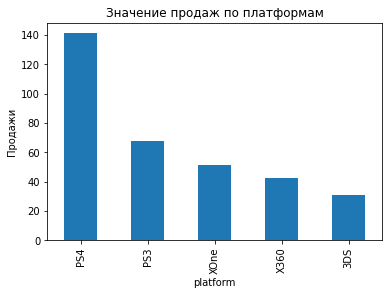

In [24]:
print(best_platforms_top('eu_sales', 'sales_median', 'Европа'))

platform  count  sales_sum  sales_mean  sales_median
4       PS4    290     141.09    0.486517         0.160
3       PS3    212      67.81    0.319858         0.115
10     XOne    218      51.59    0.236651         0.090
9      X360    169      42.52    0.251598         0.110
0       3DS    122      30.96    0.253770         0.080

<AxesSubplot:title={'center':'Значение продаж по платформам'}, xlabel='platform', ylabel='Продажи'>

None


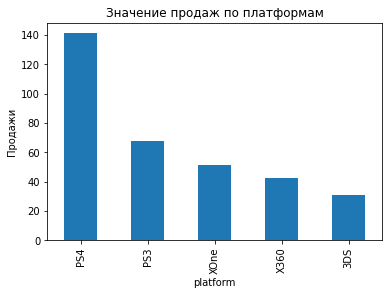

In [25]:
print(best_platforms_top('eu_sales', 'sales_sum', 'Европа'))

platform  count  sales_sum  sales_mean  sales_median
4      PS4    290     141.09    0.486517         0.160
3      PS3    212      67.81    0.319858         0.115
7      Wii     22       5.93    0.269545         0.105
0      3DS    122      30.96    0.253770         0.080
9     X360    169      42.52    0.251598         0.110

<AxesSubplot:title={'center':'Значение продаж по платформам'}, xlabel='platform', ylabel='Продажи'>

None


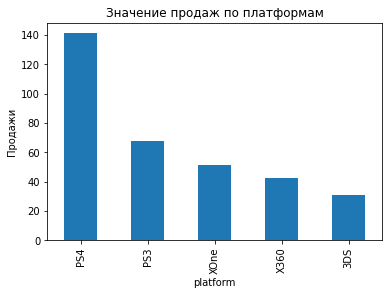

In [26]:
print(best_platforms_top('eu_sales', 'sales_mean', 'Европа'))

Медианное и среднее значения для группы платформ примерно одинаковые, поэтому в дальнейшем будем анализировать суммарные значения продаж по платформам. 

platform  count  sales_sum  sales_mean  sales_median
4      PS4    294     108.74    0.369864          0.11
9     XOne    227      93.12    0.410220          0.15
8     X360    170      81.66    0.480353          0.17
3      PS3    211      63.50    0.300948          0.11
0      3DS    119      38.20    0.321008          0.09

<AxesSubplot:title={'center':'Значение продаж по платформам'}, xlabel='platform', ylabel='Продажи'>

None


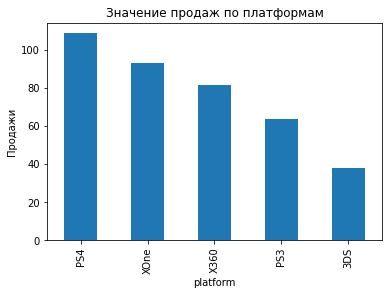

In [27]:
print(best_platforms_top('na_sales', 'sales_sum', 'Северная Америка'))

platform  count  sales_sum  sales_mean  sales_median
0      3DS    235      67.81    0.288553          0.08
1      PS3    236      23.35    0.098941          0.05
4      PSV    316      18.59    0.058829          0.03
2      PS4    223      15.96    0.071570          0.05
6     WiiU     57      10.88    0.190877          0.09

<AxesSubplot:title={'center':'Значение продаж по платформам'}, xlabel='platform', ylabel='Продажи'>

None


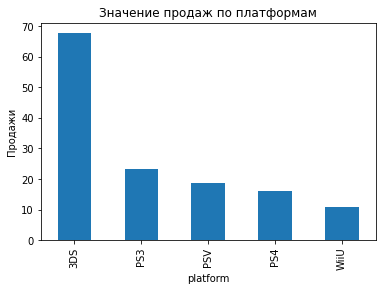

In [28]:
print(best_platforms_top('jp_sales','sales_sum', 'Япония'))

#### Выводы:
- Самая маленькая разница в продажах наблюдается в Северной Америке, самая большая - в Японии
- Среди платформ в Северной Америке и Европе лидирует PS4, а в Японии - 3DS, которая для Европы и Америки располагается на предпоследнем и последнем местах по популярности соответственно. При этом PS4 в Японии находится на 4 месте.
- Также в Америке и Европе разница в продажах между самой популярной платформой в топе и другими платформами намного меньше, чем тот же разрыв в показателях в Японии, то есть пользователи в Японии в основном предпочитают только одну платформу (3DS)

Можно предположить, что пользователи в Северной Америке и Европе имеют примерно одинаковые предпочтения, но сильно отличаются от пользователей в Японии. 

### Самые популярные жанры (топ-5). Поясните разницу.

Напишем функцию, которая для всех регионов будет анализировать показатели продаж по 5 самым популярным жанрам:

In [29]:
def best_sum(region, column, title):
    best_platforms = (data[data[region] > 0].groupby(column)
                    .agg(
                        count = (region, 'count'),
                        sales_sum = (region, 'sum'))
                    .reset_index()
                )
    display(best_platforms.sort_values('sales_sum', ascending=False).head())
    plt.title('Суммарное значение продаж по жанрам')
    plt.xlabel('Платформы')
    plt.ylabel('Продажи')
    display(data[data[region] > 0].groupby(column)[region].sum().sort_values(ascending=False)
            .head(5).plot.bar(y='sales_sum'))

genre  count  sales_sum
0         Action    494     118.13
8        Shooter    171      87.86
10        Sports    169      60.52
7   Role-Playing    155      36.97
6         Racing     78      20.19

<AxesSubplot:title={'center':'Суммарное значение продаж по жанрам'}, xlabel='genre', ylabel='Продажи'>

None


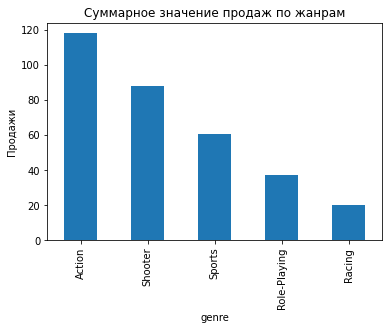

In [30]:
print(best_sum('eu_sales', 'genre', 'Европа'))


genre  count  sales_sum
0         Action    442     126.05
8        Shooter    171     109.74
10        Sports    143      65.27
7   Role-Playing    158      46.40
3           Misc     84      27.49

<AxesSubplot:title={'center':'Суммарное значение продаж по жанрам'}, xlabel='genre', ylabel='Продажи'>

None


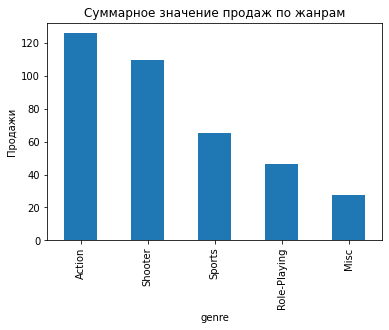

In [31]:
print(best_sum('na_sales', 'genre', 'Северная Америка'))

genre  count  sales_sum
7  Role-Playing    236      51.04
0        Action    400      40.49
3          Misc     90       9.20
2      Fighting     59       7.65
8       Shooter     69       6.61

<AxesSubplot:title={'center':'Суммарное значение продаж по жанрам'}, xlabel='genre', ylabel='Продажи'>

None


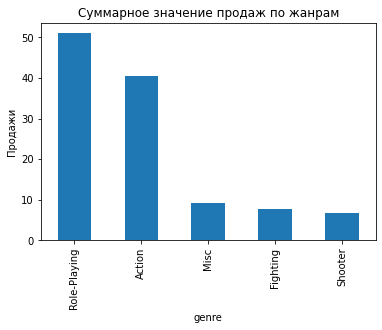

In [32]:
print(best_sum('jp_sales', 'genre', 'Япония'))

#### Выводы:
- В Европе и Америке пользователи предпочитают жанры Action и Shooter, но продажи игр других жанров недостаточно малочисленны, чтобы говорить о монополии или олигополии на рынке
- В Японии тоже предпочтительным является жанр Action, а также Role-Playing, но другие жанры остаются почти без внимания пользователей (продажи в 4-5 раз меньше)

Таким образом, в случае выбора жанров игр наблюдается та же стратегия, что и в выборе платформы: в Европе и Америке нет значительного различия в продажах, в Японии - есть.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [33]:
def sales_relation(data, region, column, title):
    (data[data[region] > 0].pivot_table(index=column, values=region, aggfunc='sum')
    .plot(grid=True, kind='bar', title=title, figsize=(10, 5)))
#функция для нахождения корреляции с учетом региона    

None


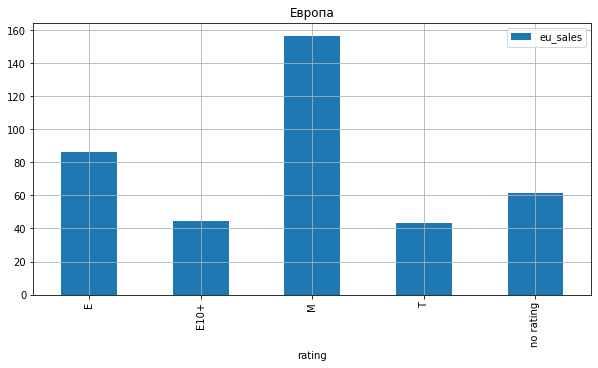

In [34]:
print(sales_relation(data, 'eu_sales', 'rating','Европа'))

None


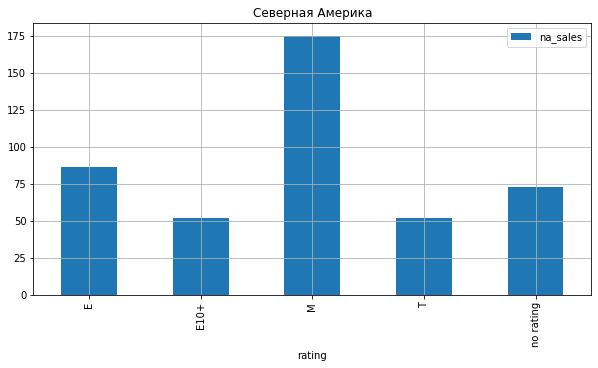

In [35]:
print(sales_relation(data, 'na_sales', 'rating','Северная Америка'))

None


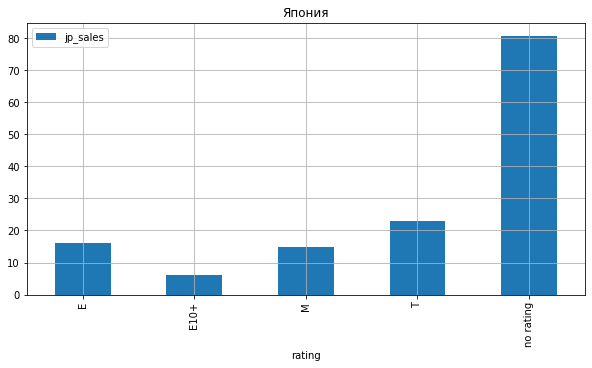

In [36]:
print(sales_relation(data, 'jp_sales', 'rating','Япония'))

- В Америке и Европе показатели вновь примерно совпадают - самыми популярными являются игры с рейтингом "M" (Mature - для взрослых).
- В Японии же большинство популрных игр не имеют рейтинга ESRB.

## Проверьте гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В качестве нулевой гипотезы мы возьмем равенство средних значений, потому что нулевая гипотеза обычно формулируется как отсутствие различий. Альтернативной гипотезой, соответственно, будет неравенство средних значений, так как нулевая и средняя гипотеза должны в совокупности покрывать все варианты соотношений. 
В данном случае нам нужно найти среднее для двух генеральных (потому что мы берем совокупности полностью) совокупностью, значения которых не зависят друг от друга, поэтому в качестве функции проверки будем использовать st.ttest_ind.
Чтобы проверить гипотезу, нам прежде всего надо определить, насколько различаются дисперсии выборок по жанрам Xbox One и PC, чтобы понять, считать ли их равными:

In [37]:
xbox_rating = data[(data['platform'] == 'XOne') & ~(data['user_score'].isna())]['user_score'].values
pc_rating =data[(data['platform'] == 'PC') & ~(data['user_score'].isna())]['user_score'].values
xbox_disp = np.var(xbox_rating, ddof=1)
pc_disp = np.var(pc_rating, ddof=1)

print('Дисперсия выборки по Xbox One:', xbox_disp)
print('Дисперсия выборки по PC:', pc_disp)

Дисперсия выборки по Xbox One: 1.9069967
Дисперсия выборки по PC: 3.0358927


Дисперсии сильно различаются, поэтому при проверке гипотезы параметру equal_var присвоим значением False. Переходим к проверке гипотезы:

In [38]:
alpha = 0.05

result = st.ttest_ind(xbox_rating, pc_rating, equal_var=False)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.147597032047728
Не получилось отвергнуть нулевую гипотезу


Полученный уровень значимости говорит о том, что в среднем пользователи относительно одинаково оценивают платформы Xbox One и PC. Это подтверждает тот факт

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В качестве нулевой гипотезы используем утверждение, что средние значения оценок пользователей для двух исследуемых жанров равны (по принципу, описанному в п. 5.1). Соответственно, альтернативная гипотеза - неравенство средних значений.
Мы так же работаем с генеральными совокупностями, где значения не связаны между собой (не определяют друг друга), поэтому, как и в прошлом пункте, в качестве функции проверки будем использовать st.ttest_ind.
Исследуем дисперсии выборок:

In [39]:
action_rating = data[(data['genre'] == 'Action') & ~(data['user_score'].isna())]['user_score'].values
sports_rating = data[(data['genre'] == 'Sports') & ~(data['user_score'].isna())]['user_score'].values

action_disp = np.var(action_rating, ddof=1)
sports_disp = np.var(sports_rating, ddof=1)

print('Дисперсия выборки по жанру Action:', action_disp)
print('Дисперсия выборки по жанру Sports:', sports_disp)

Дисперсия выборки по жанру Action: 1.7693609
Дисперсия выборки по жанру Sports: 3.1806128


Дисперсии сильно различаются, поэтому при проверке гипотезы параметру equal_var присвоим значением False. Переходим к проверке гипотезы:

In [40]:
alpha = 0.05

result = st.ttest_ind(action_rating, pc_rating, equal_var=False)

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00031870219232550993
Отвергаем нулевую гипотезу


Полученный уровень значимости показывает, что средние пользовательские рейтинги жанров Action и Sports действительно различаются. Возможно, это утверждение вновь доказывает, что пользовательские оценки не коррелируют с продажами, так как оба жанра являются популярными по продажам в Америке и Европе, но при этом различаются в пользовательских оценках.

## Напишите общий вывод


### Опишем промежуточные результаты проекта.
#### Выявление актуальных платформ на начало 2017 года:
- Рост количества игр начинается примерно в 1993 году, резкий скачок значения приходится на 2000 год. Самое большое количество игр выходило примерно в 2008-2009 годах. Если выделять диапазон выдающихся значений, то это период с 2005 по 2011 года.
- В основном платформы существуют от 7 до 10 лет. Мы выявили платформы, для которых продажи на данный момент времени достигли пика (или просто не наблюдается падения продаж): PS4, PC, 3DC, XOne, WiiU
- Все выбранные платформы начали существовать после 2013 года, поэтому в качестве актуального периода был выбран диапазон с 2013 по 2016 годы.
- Для платформ с большими продажами свойственен больший диапазон продаж. При этом для всех выбранных популярными платформ наблюдаются аномальные значения в продажах, больше всего выбросов у платформы с самыми большими продажами - PS4.
- Медиана продаж платформ 'PS4', 'XOne', 'WiiU' примерно равна 0.2, при этом медиана платформ 3DC и PC меньше - около 0.9 и 0.7 соответственно. Эту разницу можно объяснить тем, что платформы с медианой 0.2 уже почти полностью приблизились к оси абсцисс, то есть завершили снижение продаж, а для платформ с меньшей медианой продажи все еще накапливаются.
- Всем рассмотренным платформам свойственно следующее явление: диапазон с небольшими продажами меньше диапазона с большими продажами - об этом свидетельствует длина квартилей. Таким образом, до медианного значения продаж значения варьируются незначительно, но продажи, большие медианного значения, могут сильно варьироваться, но при этом каждое такое значение встречается реже значения из диапазона меньших затрат.
- Когда пользователи ставят низкие оценки (до 5), продажи действительно маленькие. Но далее корреляцию между продажами и оценками пользователей выявить невозможно.
- Прослеживается  положительная корреляция между оценками критиков и уровнем продаж: чем выше оценка, тем больше продаж. При больших оценках критиков (70+), диапазон значений продаж очень большой, встречаются как маленькие, так и очень большие значения. Таким образом, корреляция между оценками критиков и продажами в большей степени присутствует для игр, которым критики ставят не слишком высокие оценки.
- Самое большое суммарное количество продаж наблюдается для игр в жанре Action, таких этом игр этого жанра также больше всего в выборке, что объясняет предыдущий вывод. При этом и по медианному, и по среднему значению продаж лидируют игры в жанре Shooter (в 4 раза меньше по количеству, чем игр в жанре Action). Также популярным является жанр Sports. Самыми неприбыльными жанрами в целом можно назвать Puzzle, Strategy, Adventure (последний жанр при этом представлен в большом количестве).

#### Портрет пользователя каждого региона:
- Самая маленькая разница в продажах в зависимости от платформы наблюдается в Северной Америке, самая большая - в Японии
- Среди платформ в Северной Америке и Европе лидирует PS4, а в Японии - 3DS, которая для Европы и Америки располагается на предпоследнем и последнем местах по популярности соответственно. При этом PS4 в Японии находится на 4 месте.
- Также в Америке и Европе разница в продажах между самой популярной платформой в топе и другими платформами намного меньше, чем тот же разрыв в показателях в Японии, то есть пользователи в Японии в основном предпочитают только одну платформу (3DS)
- Можно предположить, что пользователи в Северной Амрике и Европе имеют примерно одинаковые предпочтения, но сильно отличаются от пользователей в Японии.
- В Европе и Америке пользователи предпочитают жанры Action и Shooter, но продажи игр других жанров недостаточно малочисленны, чтобы говорить о монополии или олигополии на рынке
- В Японии тоже предпочтительным является жанр Action, а также Role-Playing, но другие жанры остаются почти без внимания пользователей (продажи в 4-5 раз меньше)
- Таким образом, в случае выбора жанров игр наблюдается та же стратегия, что и в выборе платформы: в Европе и Америке нет значительного различия в продажах, в Японии - есть.
- В Америке и Европе показатели по самым популярным рейтингам (в соответствии с продажами) вновь примерно совпадают - самыми популярными являются игры с рейтингом "M" (Mature - для взрослых).
- В Японии же большинство популярных игр не имеют маркировки рейтинга ESRB.

#### Проверка гипотез:
-  в среднем пользователи относительно одинаково оценивают платформы Xbox One и PC. Это подтверждается тем фактом, что обе платформы являются популярными в настоящий момент времени.
- Средние пользовательские рейтинги жанров Action и Sports действительно различаются. Возможно, это утверждение вновь доказывает, что пользовательские оценки не коррелируют с продажами, так как оба жанра являются популярными по продажам в Америке и Европе, но при этом различаются в пользовательских оценках.

#### Планирование рекламной кампании на 2017 год: 
##### Среди платформ важно уделить внимание: 
- PS4, которая является одной из самых популярных в Европе и Америке, и попала в топ-5 платформ в Японии 
- Xbox One - развивающаяся платформа, очень популярная в Европе и Америке
- 3DS - платформа, на которую приходятся основные продажи в Японии, при этом в Европе и Америке она попала в топ-5

##### Среди жанров следует сосредоточить ресурсы на:

- Shooter - игры данного жанра имеют вторые по численности самые высокие продажи в Северной Америке и Европе 
- Role-Playing - игры этого жанра имеют самые высокие показатели продаж в Японии (0.22 млн), а также попадают в топ-5 жанров в Америке и Европе
-  Action - является самым популярным жанром по продажам среди пользователей Америки и Европы, а также находятся на втором месте в рейтинге для Японии, при этом сильно отличаясь по продажам от игр других жанров

#####  Стоит также учесть, что в Северной Америке и Европе лучше всего продаются игры для взрослых (рейтинг M).